## Problem Statement:
Segment customers based on their spending behavior to better understand and target marketing efforts.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [14]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\assignment 2\Customer Segmentation using K-Means Clustering\customer_segmentation.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Female,21,16,81
2,3,Female,20,17,6
3,4,Male,23,18,77
4,5,Male,31,20,40


In [16]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

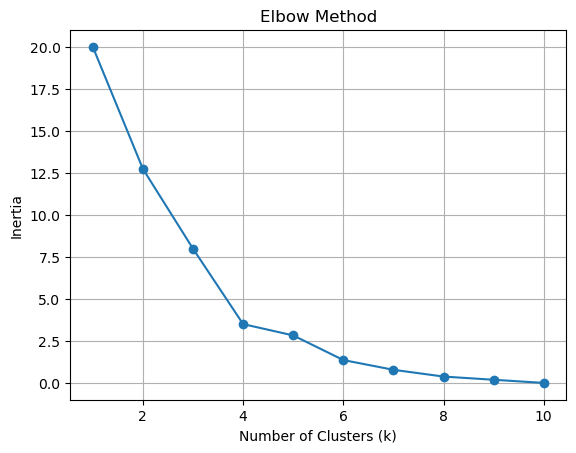

In [23]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

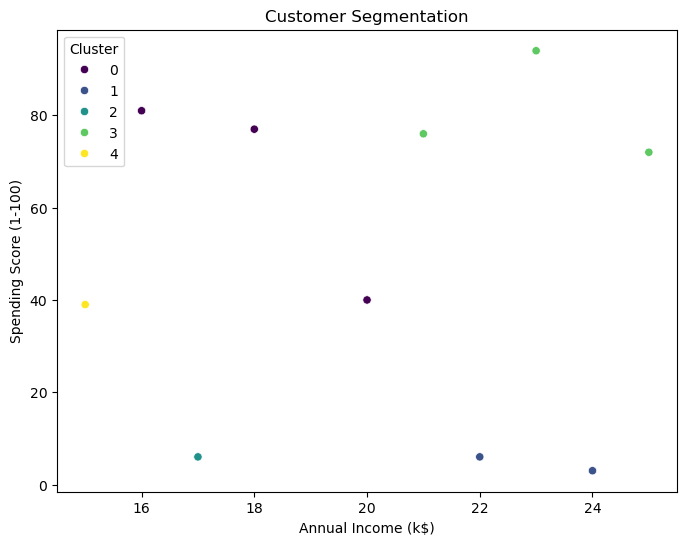

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title("Customer Segmentation")
plt.show()